# Análisis del conjunto de datos Wine Quality

Este notebook analiza el conjunto de datos de calidad del vino tinto (winequality-red.csv), incluyendo análisis estadístico, visualización y escalamiento de características.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Configuración para visualizaciones
plt.style.use('seaborn-v0_8')  # Usando el estilo compatible
sns.set_theme(style="ticks")

## 1. Carga y exploración inicial de datos

In [4]:
# Cargar el conjunto de datos
df = pd.read_csv('winequality-red.csv', sep=',')

# Mostrar las primeras filas y la información del DataFrame
print("Primeras filas del dataset:")
display(df.head())

print("\nInformación del dataset:")
display(df.info())

Primeras filas del dataset:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


None

## 2. Análisis de variables numéricas y categóricas

In [5]:
# Identificar variables numéricas y categóricas
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

print("Variables numéricas:")
print(list(numeric_cols))
print("\nVariables categóricas:")
print(list(categorical_cols))

Variables numéricas:
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

Variables categóricas:
[]


## 3. Visualización con Pairplot

<Figure size 2000x2000 with 0 Axes>

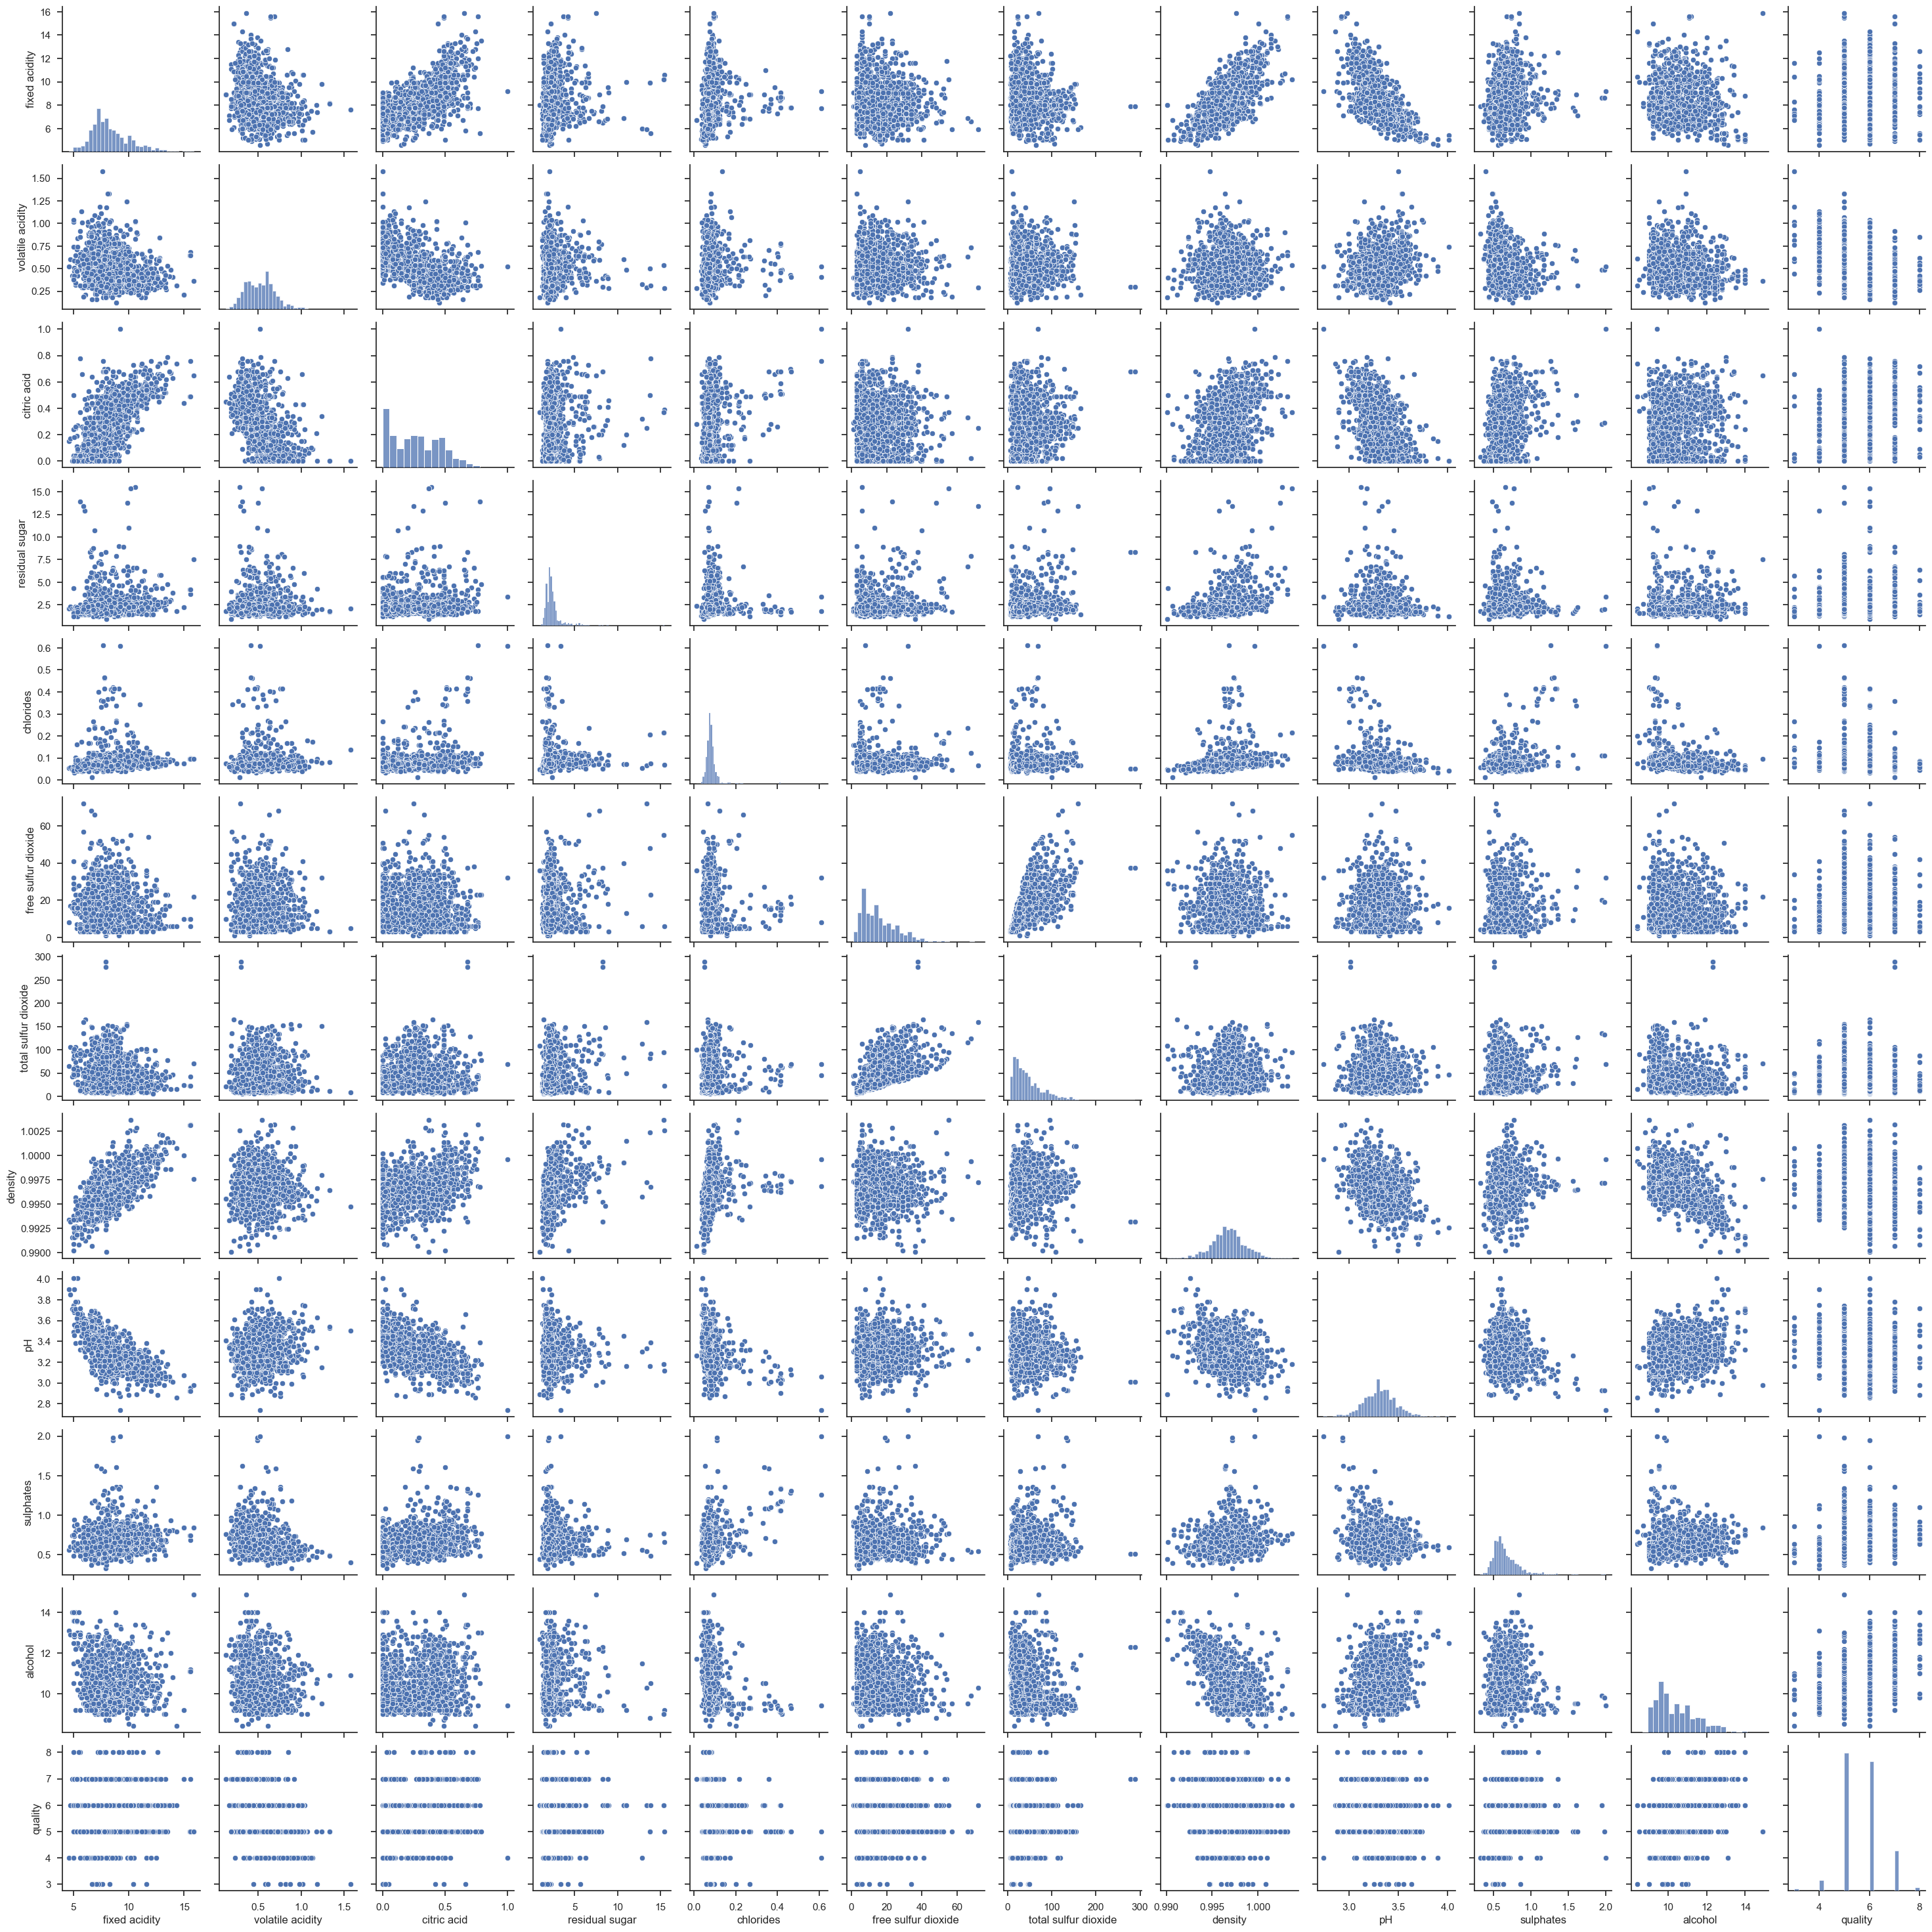

In [6]:
# Crear pairplot de todas las variables numéricas
plt.figure(figsize=(20, 20))
sns.pairplot(df)
plt.show()

## 4. Estadísticos descriptivos para la variable alcohol

In [7]:
# Calcular estadísticos de tendencia central
central_tendency = {
    'Media': df['alcohol'].mean(),
    'Mediana': df['alcohol'].median(),
    'Moda': df['alcohol'].mode()[0]
}

# Calcular estadísticos de dispersión
dispersion = {
    'Desviación estándar': df['alcohol'].std(),
    'Varianza': df['alcohol'].var(),
    'Rango': df['alcohol'].max() - df['alcohol'].min(),
    'IQR': df['alcohol'].quantile(0.75) - df['alcohol'].quantile(0.25)
}

print("Estadísticos de tendencia central:")
for stat, value in central_tendency.items():
    print(f"{stat}: {value:.4f}")

print("\nEstadísticos de dispersión:")
for stat, value in dispersion.items():
    print(f"{stat}: {value:.4f}")

Estadísticos de tendencia central:
Media: 10.4230
Mediana: 10.2000
Moda: 9.5000

Estadísticos de dispersión:
Desviación estándar: 1.0657
Varianza: 1.1356
Rango: 6.5000
IQR: 1.6000


## 5. Estandarización con StandardScaler

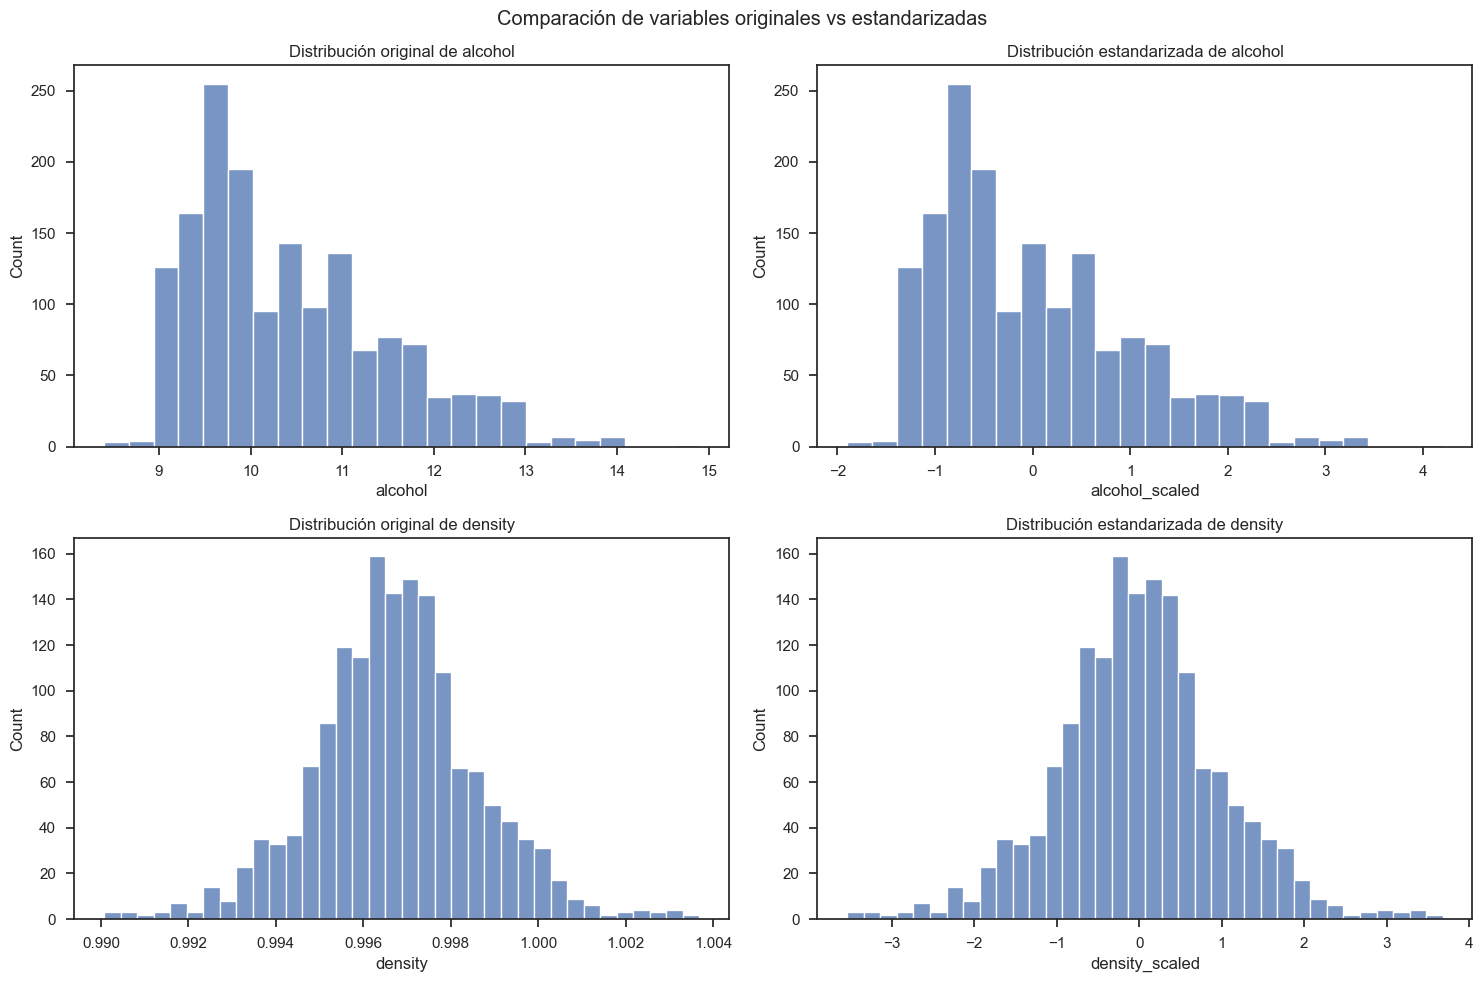


Estadísticos descriptivos de las variables originales:


,alcohol,density
count,1599.000000,1599.000000
mean,10.422983,0.996747
std,1.065668,0.001887
min,8.400000,0.990070
25%,9.500000,0.995600
50%,10.200000,0.996750
75%,11.100000,0.997835
max,14.900000,1.003690



Estadísticos descriptivos de las variables estandarizadas:


,alcohol_scaled,density_scaled
count,1.599000e+03,1.599000e+03
mean,1.066481e-16,-3.473172e-14
std,1.000313e+00,1.000313e+00
min,-1.898919e+00,-3.538731e+00
25%,-8.663789e-01,-6.077557e-01
50%,-2.093081e-01,1.760083e-03
75%,6.354971e-01,5.768249e-01
max,4.202453e+00,3.680055e+00


In [8]:
# Seleccionar dos variables para estandarizar
variables_to_scale = ['alcohol', 'density']

# Aplicar StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[variables_to_scale])
df_scaled = pd.DataFrame(scaled_data, columns=[f"{col}_scaled" for col in variables_to_scale])

# Comparar distribuciones
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Comparación de variables originales vs estandarizadas')

for idx, var in enumerate(variables_to_scale):
    # Original
    sns.histplot(data=df[var], ax=axes[idx, 0])
    axes[idx, 0].set_title(f'Distribución original de {var}')
    
    # Estandarizada
    sns.histplot(data=df_scaled[f"{var}_scaled"], ax=axes[idx, 1])
    axes[idx, 1].set_title(f'Distribución estandarizada de {var}')

plt.tight_layout()
plt.show()

# Mostrar estadísticos descriptivos
print("\nEstadísticos descriptivos de las variables originales:")
display(df[variables_to_scale].describe())

print("\nEstadísticos descriptivos de las variables estandarizadas:")
display(df_scaled.describe())

## 6. Normalización con MinMaxScaler

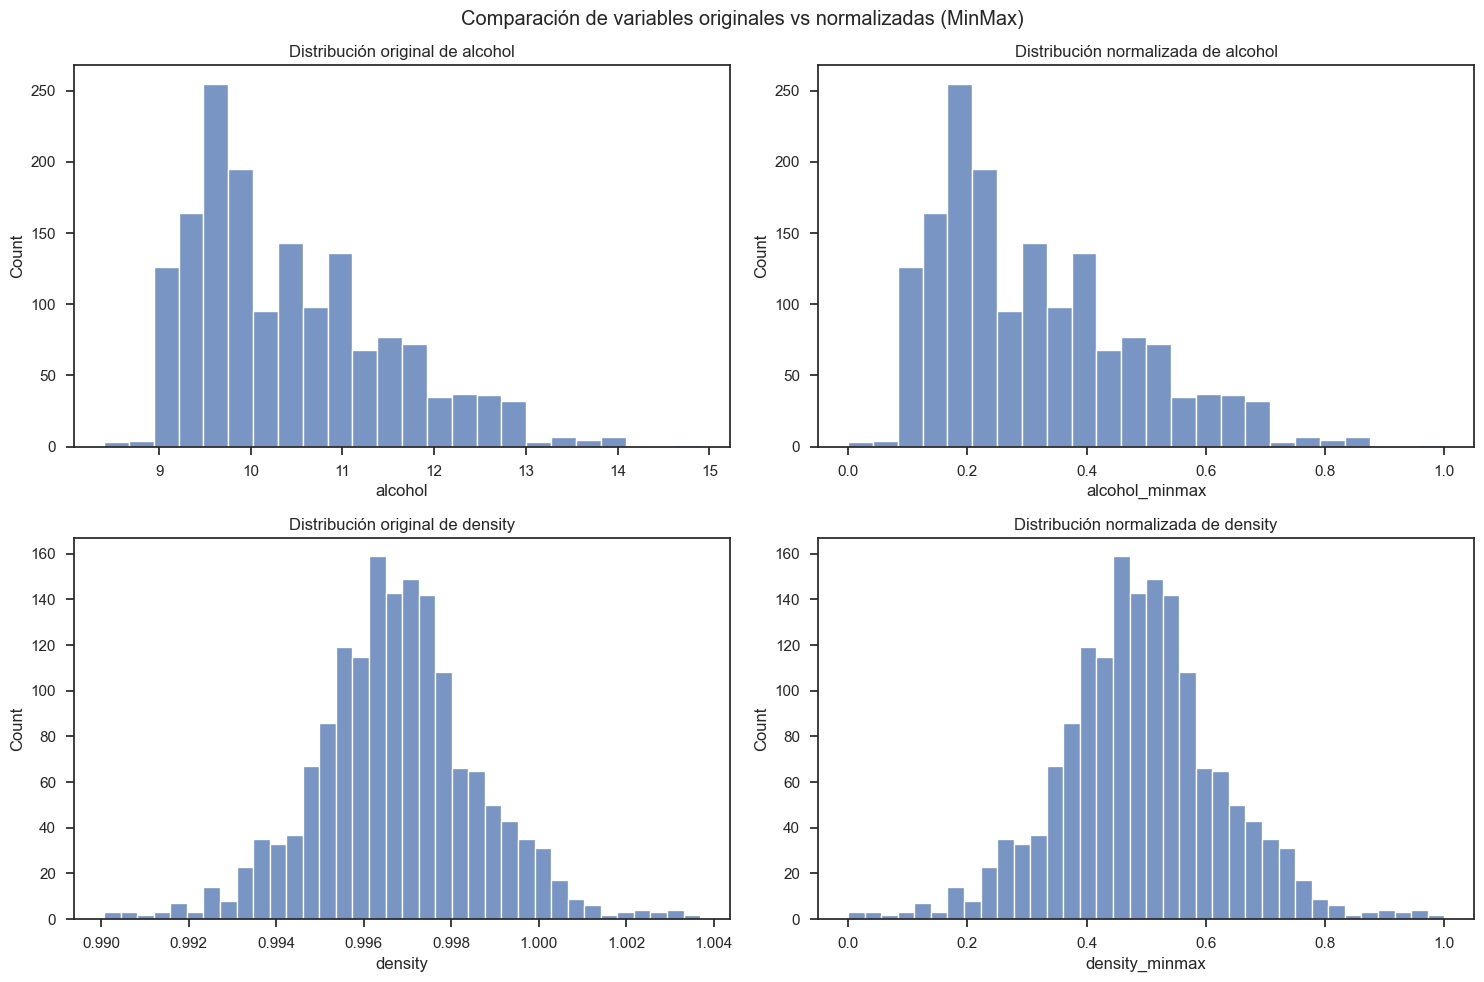


Estadísticos descriptivos de las variables normalizadas:


,alcohol_minmax,density_minmax
count,1599.000000,1599.000000
mean,0.311228,0.490211
std,0.163949,0.138571
min,0.000000,0.000000
25%,0.169231,0.406021
50%,0.276923,0.490455
75%,0.415385,0.570117
max,1.000000,1.000000


In [9]:
# Aplicar MinMaxScaler
min_max_scaler = MinMaxScaler()
minmax_scaled_data = min_max_scaler.fit_transform(df[variables_to_scale])
df_minmax = pd.DataFrame(minmax_scaled_data, columns=[f"{col}_minmax" for col in variables_to_scale])

# Comparar distribuciones
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Comparación de variables originales vs normalizadas (MinMax)')

for idx, var in enumerate(variables_to_scale):
    # Original
    sns.histplot(data=df[var], ax=axes[idx, 0])
    axes[idx, 0].set_title(f'Distribución original de {var}')
    
    # Normalizada
    sns.histplot(data=df_minmax[f"{var}_minmax"], ax=axes[idx, 1])
    axes[idx, 1].set_title(f'Distribución normalizada de {var}')

plt.tight_layout()
plt.show()

print("\nEstadísticos descriptivos de las variables normalizadas:")
display(df_minmax.describe())

## 7. Matriz de correlaciones

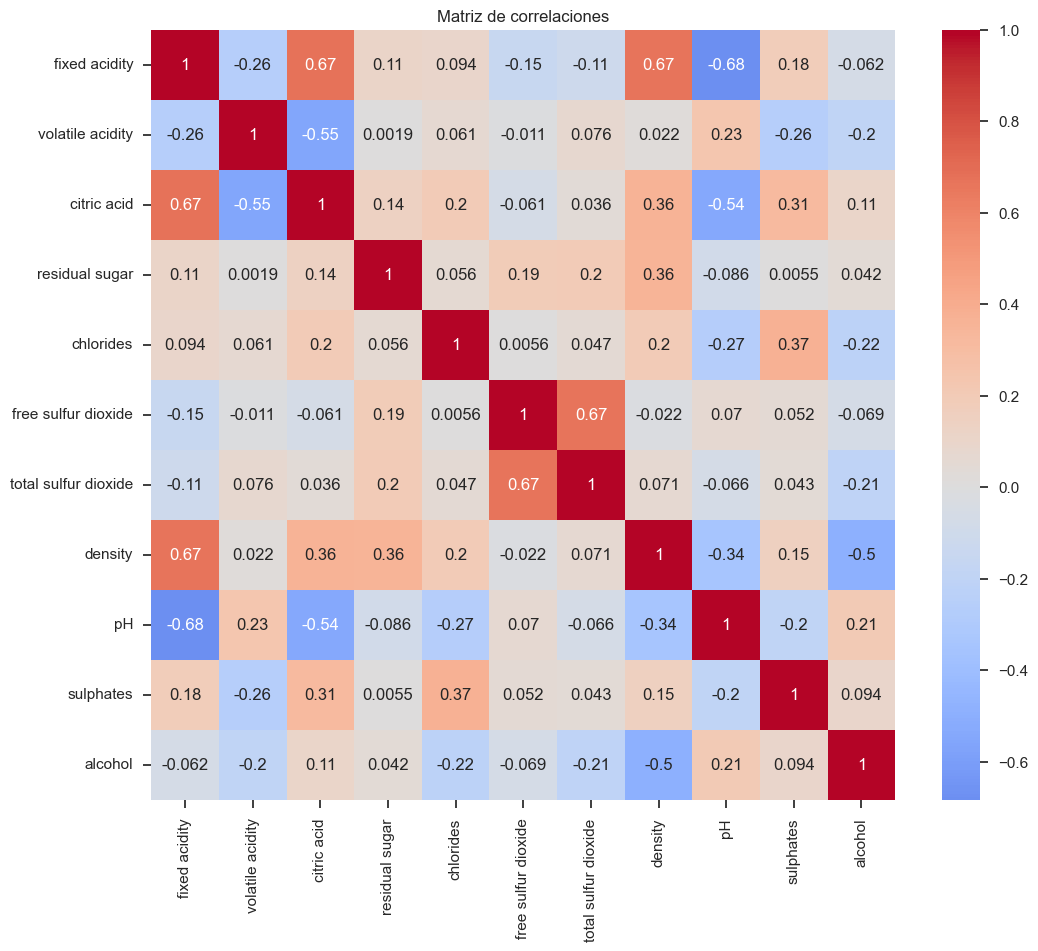

In [10]:
# Obtener todas las variables numéricas excepto quality
numeric_cols_no_quality = [col for col in numeric_cols if col != 'quality']

# Calcular la matriz de correlaciones
corr_matrix = df[numeric_cols_no_quality].corr()

# Visualizar la matriz de correlaciones
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de correlaciones')
plt.show()

## 8. Análisis de correlaciones con density

Correlaciones con density en orden descendente:


density                 1.000000
fixed acidity           0.668047
citric acid             0.364947
residual sugar          0.355283
chlorides               0.200632
sulphates               0.148506
total sulfur dioxide    0.071269
volatile acidity        0.022026
free sulfur dioxide    -0.021946
pH                     -0.341699
alcohol                -0.496180
Name: density, dtype: float64


Variables con correlación significativa (|corr| >= 0.4) con density:


fixed acidity    0.668047
alcohol         -0.496180
Name: density, dtype: float64

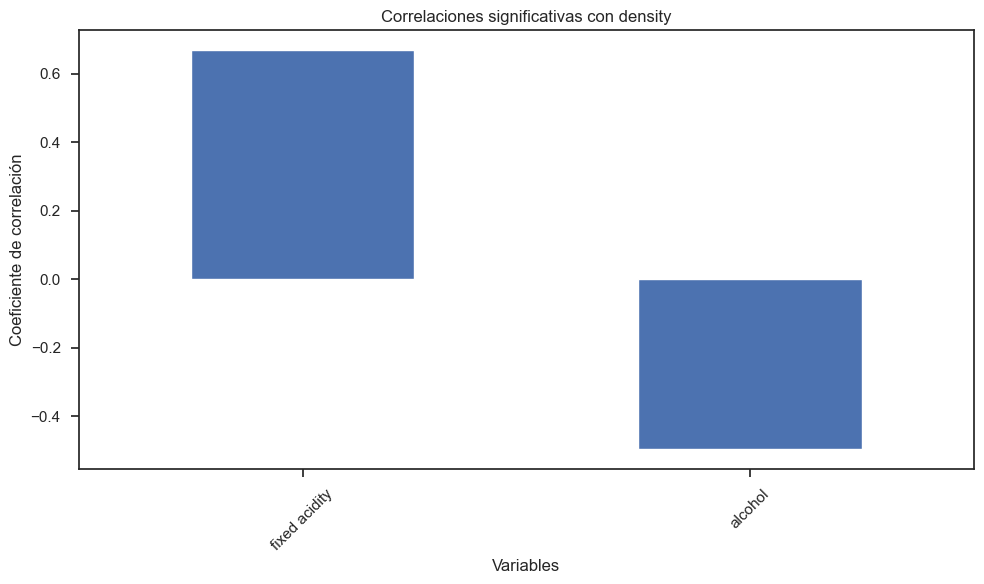

In [11]:
# Obtener correlaciones con density
density_corr = corr_matrix['density'].sort_values(ascending=False)
print("Correlaciones con density en orden descendente:")
display(density_corr)

# Filtrar correlaciones significativas (|corr| >= 0.4)
significant_corr = density_corr[abs(density_corr) >= 0.4]
significant_corr = significant_corr[significant_corr.index != 'density']  # Excluir la autocorrelación

print("\nVariables con correlación significativa (|corr| >= 0.4) con density:")
display(significant_corr)

# Visualizar las correlaciones significativas
plt.figure(figsize=(10, 6))
significant_corr.plot(kind='bar')
plt.title('Correlaciones significativas con density')
plt.xlabel('Variables')
plt.ylabel('Coeficiente de correlación')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()